 The main focus of this module is on the design of optimal allocation strategies for investors endowed with long-term liability or consumption objectives, a framework suitable to most institutional investors but also to private investors. It presents the state of the art in asset-liability management (ALM) with a specific emphasis on defining the investor's objectives and constraints, formalizing the risk-return trade-off in terms of final funding ratio and minimizing the opportunity costs of short-term constraints. 

# From Asset Management to Asset-Liability Management

Pension fund crisis:

S&P 500 DB Pension plans from Dec 199 Net Surplus of $239 billion to May 2003 Net Deficit of $252 billion

It due to the Internet bubble.

And it happened again in 2008

 If the pension fund liabilities are marked-to-market (as is the case for corporate pension plans in the US for example), then a decrease in interest rates will result in an increase in liability values, which is bad news for the pension fund. On the asset side, decreasing interest rates would lead to increasing value for bonds, and the impact on asset classes would be less straightforward, so the next effect on the surplus (that is asset value minus liability value) would tend to be negative.  

# Lab Session-Present Values,liabilities and funding ratio


The funding ratio is the ratio of the current value of assets to the present value of the liabilities.

In order to compute the present value, we need to discount the amount of the liability based on the relevant interest rate derived from the yield curve.

For simplicity, we'll assume that the yield curve is flat, and so the interest rate is the same for all horizons.

The present value of a set of liabilities $L$ where each liability $L_i$ is due at time $t_i$ is give by:

$$ PV(L) = \sum_{i=1}^{k} B(t_i) L_i$$

where $B(t_i)$ is the price of a pure discount bond that pays 1 dollar at time $t_i$

If we assume the yield curve is flat and the annual rate of interest is $r$ then $B(t)$ is given by

$$B(t) = \frac{1}{(1+r)^t}$$


In [64]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
def discount(t,r):
    """
    Compute the price of a pure discount bond that pays a dollar at time t, given interest rate r
    """
    return 1/(1+r)**t #or (1+t)**(-t)

In [66]:
discount(10,0.03)
# assume risk rate is 3%, so I need invest 0.74 at year 0 and get 1 in year 10

0.7440939148967249

In [67]:
0.7440939148967249*1.03**10

1.0

In [68]:
def pv(l,r):
    """
    Computes the present value of a sequence of liabilities
    l is indexed by the time, and the values are the amounts of each liability
    returns the present value of the sequence
    """
    dates= l.index
    discounts=discount(dates,r)
    return (discounts*l).sum()

In [69]:
liabilities=pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
# The right side is the amount of liabilities, left side is due in 3 years, 3.5 years etc.

In [70]:
liabilities
#payment schedule

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

In [71]:
pv(liabilities, 0.03)

6.233320315080044

In [72]:
liabilities.sum()

7.0

In [73]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the findina ratio of some assets given liabilities and interest rate
    """
    return assets/pv(liabilities, r)

In [74]:
funding_ratio(5, liabilities, 0.03)

0.8021407126958778

In [75]:
funding_ratio(5, liabilities, 0.02)
# the funding even worse

0.7720304366941647

In [76]:
funding_ratio(5, liabilities, 0.05)


0.8649082768407929

In [77]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_funding_ratio(assets, r):
    fr=funding_ratio(assets, liabilities, r)
    print(f'{fr*100:.2f}')

controls= widgets.interactive(show_funding_ratio,
                              assets=widgets.IntSlider(min=1, max=10, step=1, value=5),
                              r=(0, 0.2, 0.01))
display(controls)

interactive(children=(IntSlider(value=5, description='assets', max=10, min=1), FloatSlider(value=0.1, descript…

In [78]:
liabilities
# The right side is the amount of liabilities, left side is due in 3 years, 3.5 years etc.

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

If you have $5 million today and your liabilities are those liabilities that we just talked about that about $7 million in total out in the future, right? These liabilities, liabilities, right? If these are your liabilities and you have $5 million today and interest rates currently are 3%, you only have 80% of the money. 

So what are your choices? 

One, you can try and get more assets. And in a pension fund this amounts to the sponsoring company actually putting in more cash into the company. This is not something they enjoy doing, but sometimes they're forced to, sometimes by law, someone is going to have to put in some money there. 

Or the other option is you have to get a higher rate of return. You've got to end up finding some way to improve the rate of return that you're going to get on your assets on that $5 million by the time the liabilities come due. 

# Liability hedging portfolios


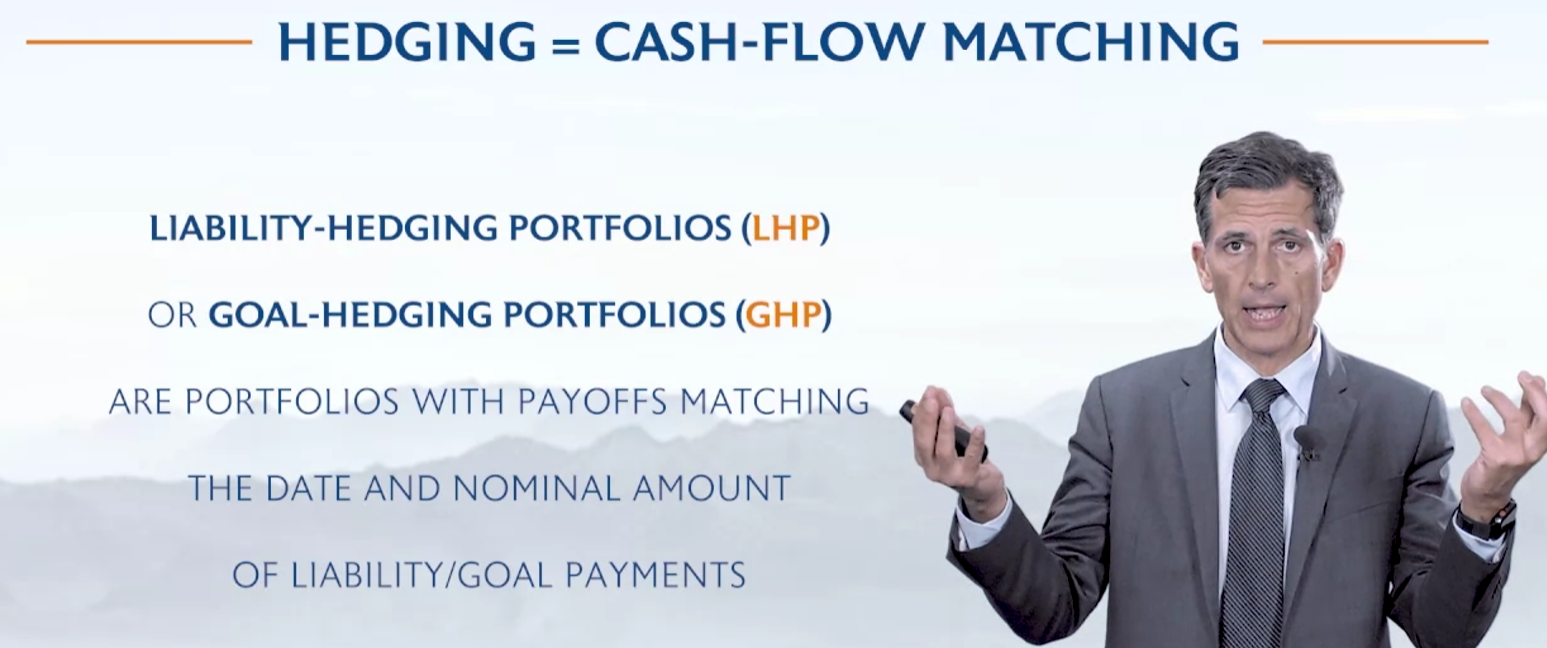

A standard Bond is not safe with respect to the goal

Retirement bonds are highly volatile


When cash-flow matching is not feasible/practical

One may use Factor Expposure Matching instead


What is the safe liability-hedging asset for a 45Y old investor preparing for retirement at age 65.

A: A deferred inflation-linked annuity with a 20 year deferral period will start paying cash flows when the investor reaches age 65, and will pay replacement income cash-flow as long as the investor is alive. This make it the perfect safe retirement asset.    

# Lab Session-CIR Model and cash vs ZC bonds

Cox-Ingersoll-Ross model, usually just called the CIR model. It is very similar to what we have already done for generating random stock prices. Instead of a Geometric Brownian Motion, the mean reversion model features parameters to control the speed of mean reversion as well as the long term average rate.

$$ dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t} $$

where $a$ is the speed of mean reversion and $b$ is the long term mean rate and $\sigma$ is the volatility parameter.

$${\sqrt  {r_{t}}}\,dW_{t} $$ 

consider the sigma times a random number

## Short rate VS Annualized rate

Short rate is just for few days

In [79]:
1+1*1 #100% interest per year

2

In [80]:
1+1*0.5+(1+1*0.5)*0.5

2.25

In [81]:
(1+1/2)**2

2.25

In [82]:
(1+1/4)**4

2.44140625

In general, if we compound every 1/N of a year (i.e. N times a year) we get:

$$\left(1+\frac{r}{N}\right)^N$$


In [83]:
(1+1/10000)**10000

#It's closer with e

2.7181459268249255

In [84]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

def inst_to_ann(r):
    """
    Convert an short rate (instantaneous interest rate) to an annual interest rate
    """
    return np.expm1(r) # equally with np.exp(r)-1

def ann_to_inst(r):
    """
    Convert an annual interest rate to an short rate (instantaneous interest rate)  
    """
    return np.log1p(r) # equally with np.log(1+r)

def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model for interest rates
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rates, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios)) #generate random numbers
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step] # check the below formula
        rates[step] = abs(r_t + d_r_t) # just in case of roundoff errors going negative
        
    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$ dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t} $$

<Axes: >

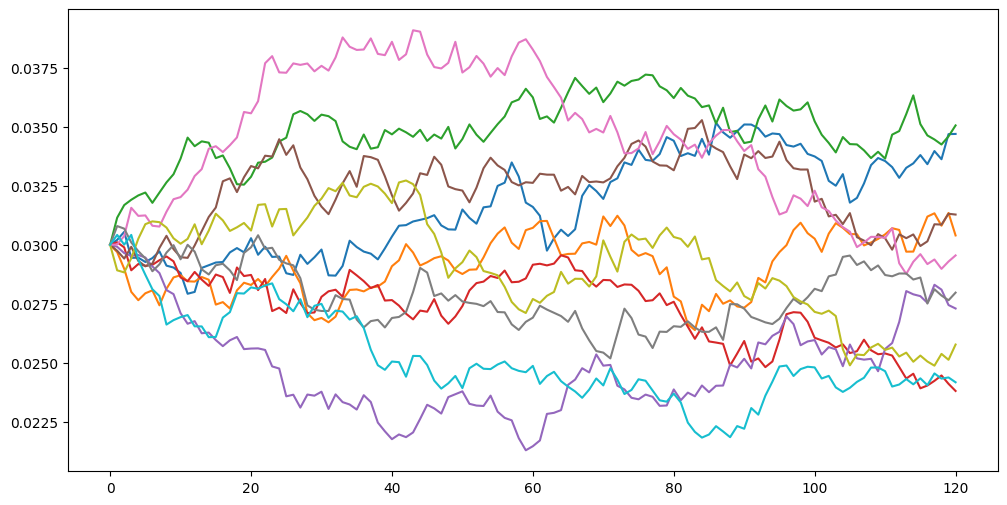

In [85]:
cir(n_scenarios=10, sigma=0.01).plot(figsize=(12,6), legend=False)

In [86]:
def show_cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios).plot(legend=False, figsize=(12,5))

import ipywidgets as widgets
from IPython.display import display
    
controls = widgets.interactive(show_cir,
                              r_0 = (0, .15, .01),
                              a = (0, 1, .1),
                               b = (0, .15, .01),
                               sigma= (0, .1, .01),
                               n_scenarios = (1, 100))
display(controls)

# when interest rates change, what happened to the zero coupon changes

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

## Generating the random price evolution of a Zero-Coupon Bond

The model can also be used to generate the movement of bond prices for a zero coupon bond that are implied by the generated interest rate, using the following equations:

$$P(t,T)=A(t,T)e^{-B(t,T)r_{t}}\!$$

where

$$ A(t,T)=\left({\frac  {2h e^{(a+h)\tau/2}}{2h+(a+h)(e^{\tau h}-1)}}\right)^{{2ab/\sigma ^{2}}} $$
and
$$ B(t,T)={\frac  {2(e^{\tau h}-1)}{2h+(a+h)(e^{\tau h}-1)}} $$
and
$$ h={\sqrt  {a^{2}+2\sigma ^{2}}} $$
and
$$ \tau = T-t $$

In [87]:
import math
def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rates, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    ## For Price Generation
    h = math.sqrt(a**2 + 2*sigma**2)
    prices = np.empty_like(shock)
    ####

    def price(ttm, r):
        _A = ((2*h*math.exp((h+a)*ttm/2))/(2*h+(h+a)*(math.exp(h*ttm)-1)))**(2*a*b/sigma**2)
        _B = (2*(math.exp(h*ttm)-1))/(2*h + (h+a)*(math.exp(h*ttm)-1))
        _P = _A*np.exp(-_B*r)
        return _P
    prices[0] = price(n_years, r_0)
    ####
    
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
        # generate prices at time t as well ...
        prices[step] = price(n_years-step*dt, rates[step])

    rates = pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))
    ### for prices
    prices = pd.DataFrame(data=prices, index=range(num_steps))
    ###
    return rates, prices


In [88]:
def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1].plot(legend=False, figsize=(12,5))

controls = widgets.interactive(show_cir_prices,
                              r_0 = (0, .15, .01),
                              a = (0, 1, .1),
                               b = (0, .15, .01),
                               sigma= (0, .1, .01),
                               n_scenarios = (1, 100))
display(controls)

# as interest rate go up, the price of bond down
# as interest rate go down, the price of bond up

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

In [89]:
a_0=0.75 #initially asset has 0.75 million
rates, bond_prices=cir(n_years=10, r_0=0.03, b=0.03, n_scenarios=10)
liabilities=bond_prices # the changes in the present value of liabilities
zcbond_10=pd.Series(data=[1], index=[10])
zc_0=erk.pv(zcbond_10, r=0.03) # 1 million, pay in 10 years, rate is 0.03
n_bonds=a_0/zc_0 # how many bonds I can buy
av_zc_bonds=n_bonds*bond_prices
av_cash=a_0*(rates/12+1).cumprod() #compounded value


<Axes: >

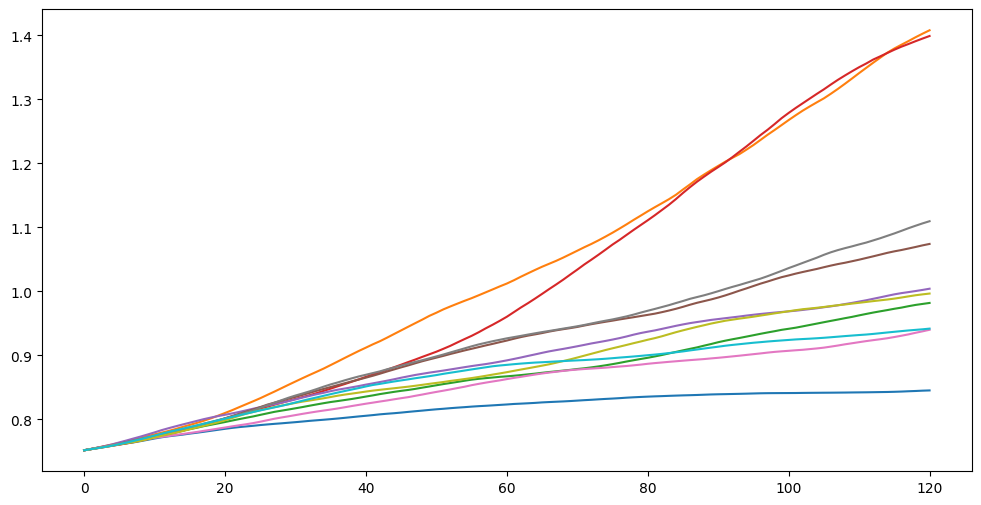

In [90]:
av_cash.plot(legend=False, figsize=(12,6))
#If put money all into cash as hedge, it's not a safe chance it could lower than 1 million

<Axes: >

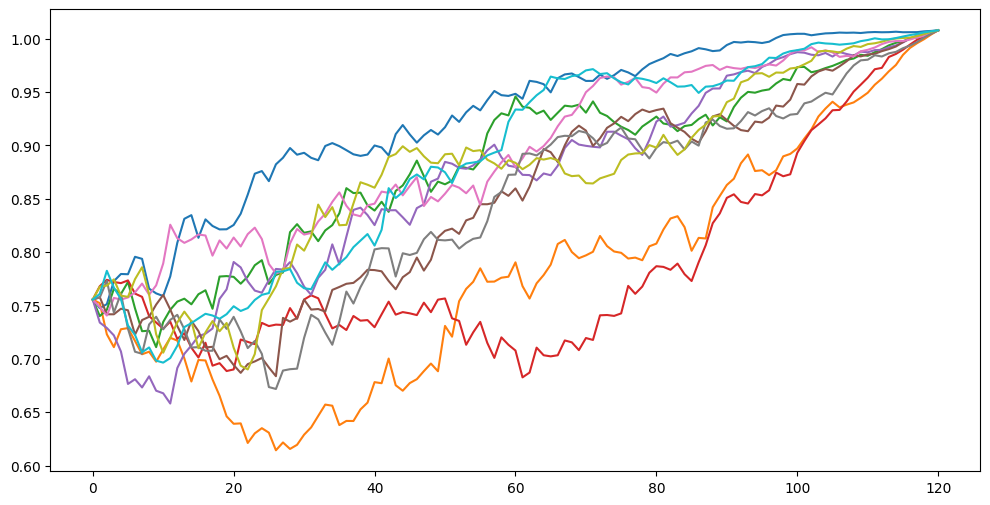

In [91]:
av_zc_bonds.plot(legend=False, figsize=(12,6))
#put money into zero coupon bonds
#It's looks more risky than cash, but it should think about funding ratio

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 Scenarios)'}>

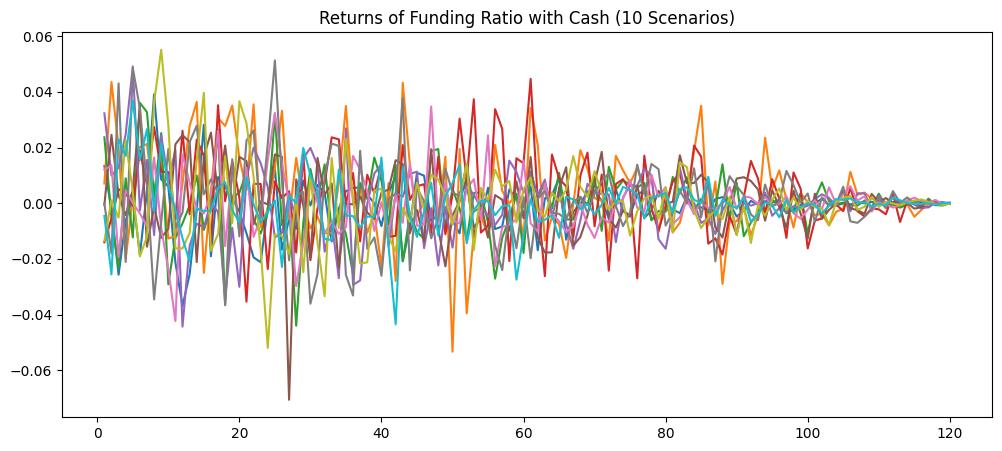

In [92]:
(av_cash/liabilities).pct_change().plot(title="Returns of Funding Ratio with Cash (10 Scenarios)", legend=False, figsize=(12,5))

For Cash, it gradually stablized when it reach to the end

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 Scenarios)'}>

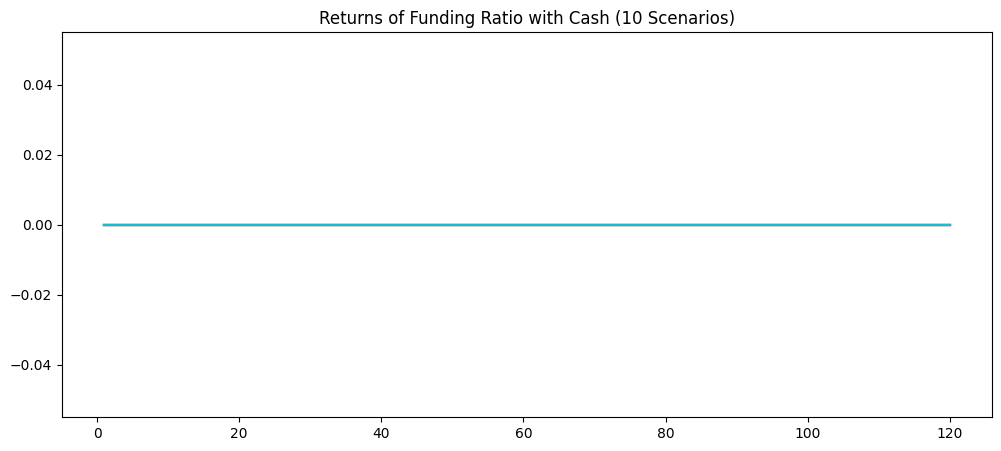

In [93]:
(av_zc_bonds/liabilities).pct_change().plot(title="Returns of Funding Ratio with Cash (10 Scenarios)", legend=False, figsize=(12,5))

For Zero Coupon bond, the funding ratio is steady, it's less sensitive to the interest rate

In [94]:
a_0=0.75
rates, bond_prices=cir(n_scenarios=10000, r_0=0.03, b=0.03)
liabilities=bond_prices
zc_0=erk.pv(zcbond_10, 0.03)
n_bonds=a_0/zc_0
av_zc_bonds=n_bonds*bond_prices
av_cash=a_0*(rates/12+1).cumprod()


<Axes: >

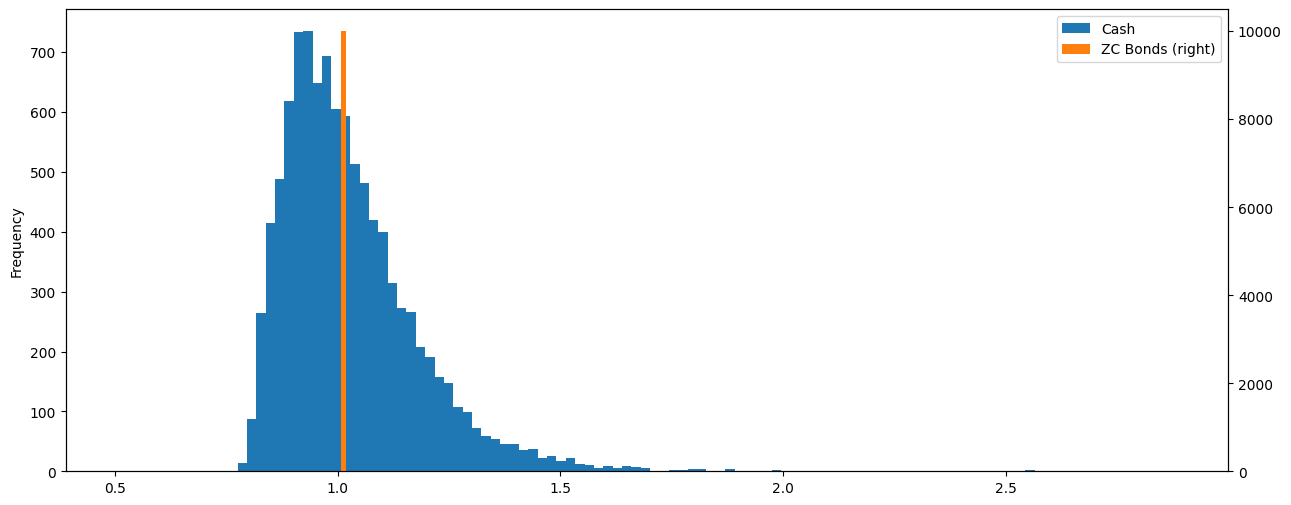

In [95]:
# terminal funding ratio
tfr_cash=av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds=av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax= tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label="ZC Bonds", bins=100, legend=True, secondary_y=True)

#If put money into cash, could loss 20% sometimes
#If put money into ZC Bonds can have a rock solid funding ratio

In [96]:
a_0=0.5
rates, bond_prices=cir(n_scenarios=10000, r_0=0.03, b=0.03)
liabilities=bond_prices
zc_0=erk.pv(zcbond_10, 0.03)
n_bonds=a_0/zc_0
av_zc_bonds=n_bonds*bond_prices
av_cash=a_0*(rates/12+1).cumprod()


<Axes: >

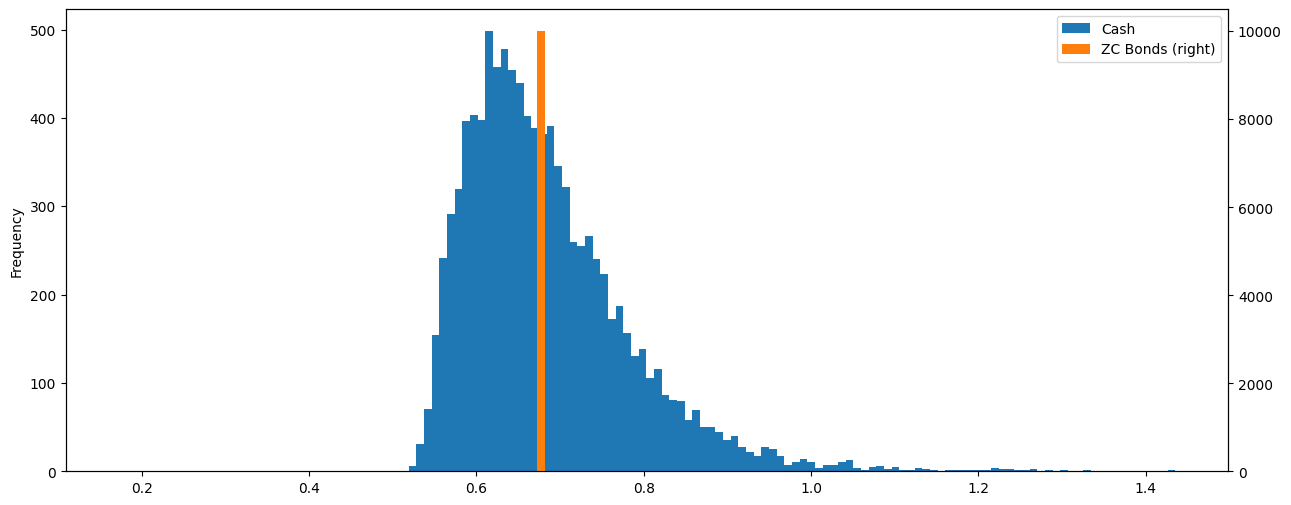

In [97]:
# terminal funding ratio
tfr_cash=av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds=av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax= tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label="ZC Bonds", bins=100, legend=True, secondary_y=True)

So in this case if there want to have a higher certainty, then choose ZC Bond is the better choice

# Liability-driven investing (LDI)


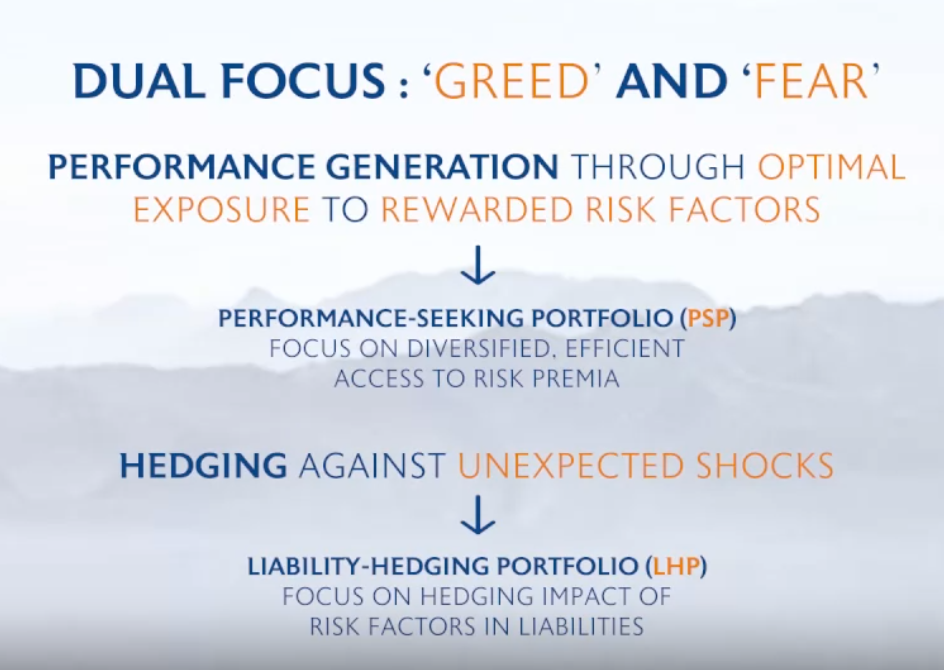

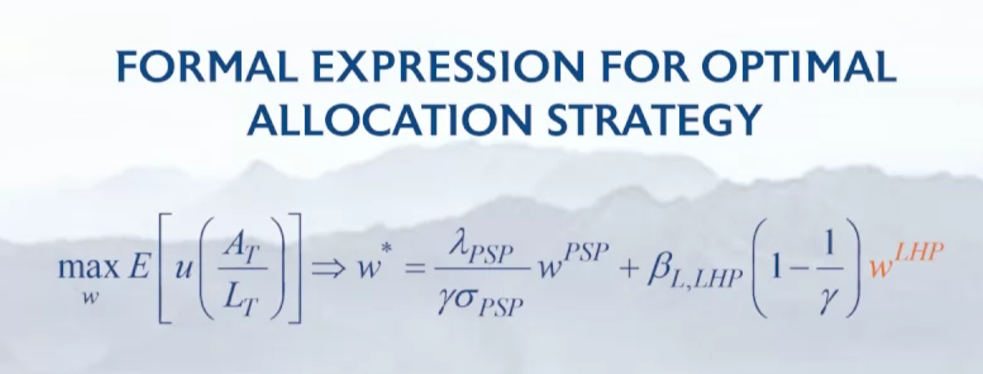

Liability risk is taken care of by the presence of the liability-hedging portfolio, and as a result the performance-seeking portfolio has a sole focus on efficient harvesting of risk premia, regardless of the exact nature of the liabilities.

Assume that the best liability-hedging portfolio a pension fund can find has a zero correlation with the liabilities and a 50% Sharpe ratio, and that the highest Sharpe ratio available has a Sharpe ratio of 100%, what should be in this case the optimal allocation to the liability hedging portfolio? 

A: 0% liabilities, If the liability-hedging portfolio has no hedging ability, then the pension fund should not hold any of this portfolio since hedging liabilities was the only reason why this portfolio was useful in the first place. 

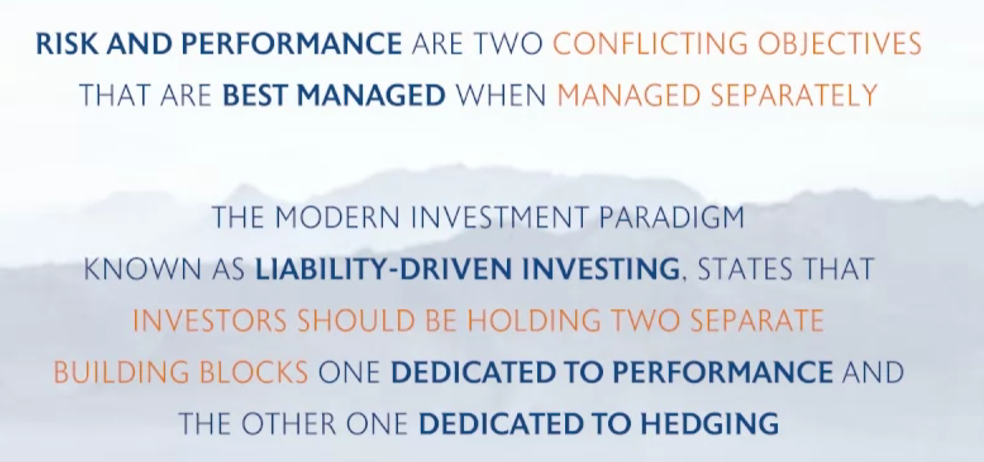

# Lab Session-Liability driven investing

In [98]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
erk.bond_cash_flows(3, 100, 0.03, 2) # in the end of the whole period get the priciple

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [100]:
erk.bond_price(20, 1000, 0.05, 2, 0.04) # 5% coupon rate, and 4% interest rate

1136.7773962036904

In [101]:
erk.bond_price(20, 1000, 0.05, 2, 0.05) # 5% coupon rate, and 5% interest rate

1000.0000000000025

In [102]:
erk.bond_price(20, 1000, 0.05, 2, 0.02) # 5% coupon rate, and 2% interest rate
# as interest fall, bond price will rise

1492.520291709342

In [103]:
rates=np.linspace(0.01, 0.1, num=20)
rates
# it's from 1% to 10%

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [104]:
prices=[erk.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
print(prices)

[1379.7483829333994, 1326.7629283179222, 1276.1632981372743, 1227.833537616068, 1181.6636507727874, 1137.5492793724407, 1095.3913999300185, 1055.0960377089514, 1016.5739967228162, 979.7406048086302, 944.5154728963503, 910.8222676519945, 878.5884967212595, 847.74530584692, 818.2272871767957, 789.9722981198867, 762.9212901465676, 737.0181469646424, 712.2095315367839, 688.4447414365]


<Axes: title={'center': 'Price of 10 y bond with diff interest rate'}>

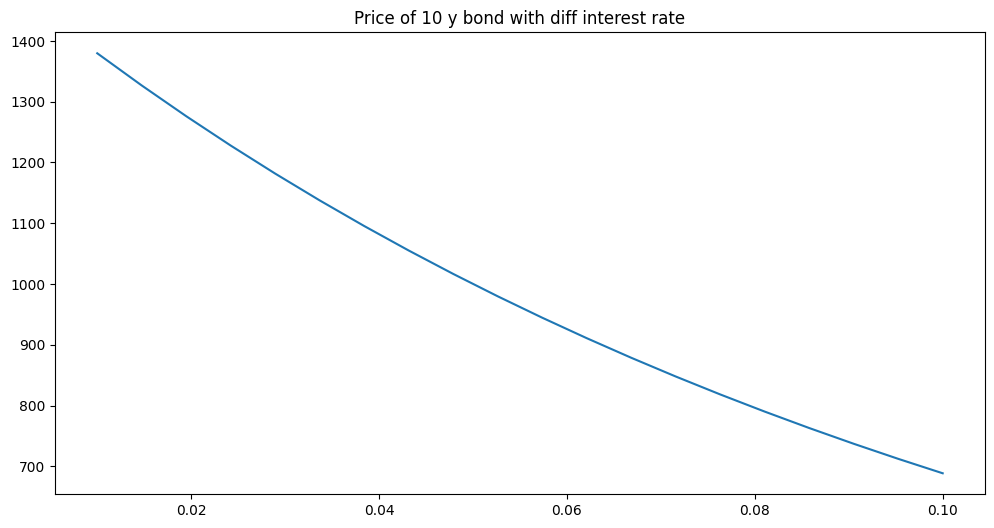

In [105]:
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10 y bond with diff interest rate", legend=False, figsize=(12,6))

In [106]:
cf=erk.bond_cash_flows(3, 100, 0.06, 2) 
# 3 years bond, $1000 face value, 6% coupon rates, 2 payments per year.
cf

1      3.0
2      3.0
3      3.0
4      3.0
5      3.0
6    103.0
dtype: float64

In [107]:
# compute discount factors
discount=erk.discount(cf.index, 0.06/2)
discount

Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531596,
       0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
      dtype='float64')

In [108]:
dcf=discount*cf
# the present value of each period cashflows
dcf

1     2.912621
2     2.827788
3     2.745425
4     2.665461
5     2.587826
6    86.260878
dtype: float64

In [109]:
weights=dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [110]:
(cf.index*weights).sum() # weighted average of all periods
# 5.57 years mean the weighted average duration
# It's called: Macaulay duration 

5.579707187194534

The Macaulay duration is the weighted average duration, and here is the key insight. The key insight is that this is directly related to the rate of chain, the first derivative of the price with respect to interest rates. So in other words, if the interest rates moves and you have a large duration, then the price is going to move a lot. If you have a short duration, then the price will not move as much. So the duration is directly linked to the amount by which the price will change when interest rates change. 

In [111]:
erk.macaulay_duration(erk.bond_cash_flows(3, 1000, 0.06, 2), 0.06/2)

5.579707187194534